In [1]:
import scanpy as sc

adata = sc.read_h5ad("/Users/aumchampaneri/PycharmProjects/Complement-OUD/GSE233279/GSE225158_BU_OUD_Striatum_refined_all_SeuratObj_N22.h5ad")
adata1 = adata
adata

AnnData object with n_obs × n_vars = 98848 × 31393
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'scds.hybrid_score', 'scds.keep', 'percent.mt', 'miQC.probability', 'miQC.keep', 'dropletQC.nucFrac', 'dropletQC.keep', 'integrated_snn_res.1', 'seurat_clusters', 'X', 'ID', 'Region', 'Pair', 'Case', 'Sex', 'Race', 'Age', 'BMI', 'PMI', 'pH', 'RIN', 'Tissue.Storage.Time.mo.b', 'Dx_OUD', 'Dx_Substances', 'Dx_Comorbid', 'Dur.OUD', 'DSM.IV.SUD', 'DSM.IV.Psych', 'Blood.Toxicology', 'Infxn.Dx', 'Medications.ATODc', 'Tobacco.ATOD', 'Manner.of.Death', 'Cause.of.Death', 'Index.27', 'Index.28', 'i7.index.seq', 'i5.index.seq', 'DSM.IV.OUD', 'DSM.IV.AUD', 'DSM.IV.CUD', 'integrated_snn_res.0.5', 'celltype1', 'celltype2', 'integrated_snn_res.2', 'celltype3', 'integrated_snn_res.0.1', 'level1', 'level2', 'n_genes'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
    obsm: 'X_umap'

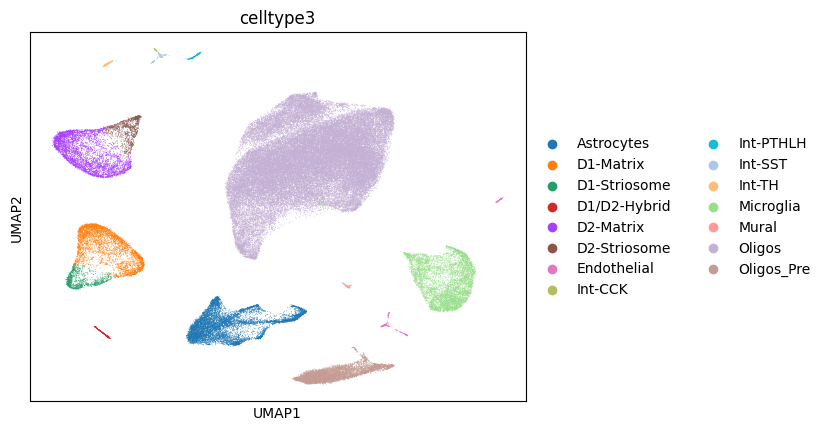

In [8]:
sc.pl.umap(adata1, color="celltype3")

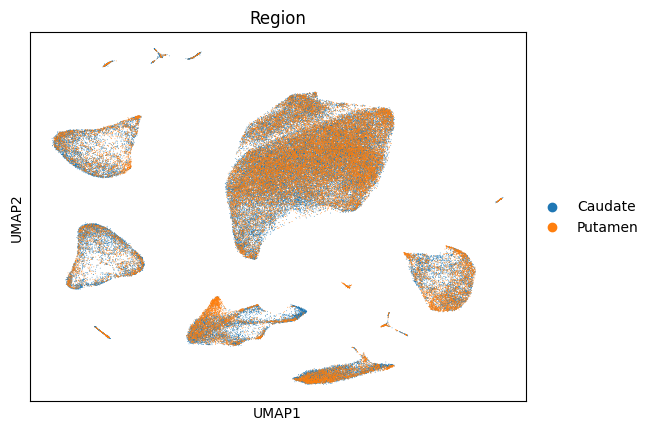

In [2]:
sc.pl.umap(adata1, color="Region")

In [4]:
import scanpy as sc

adata2 = sc.read_h5ad("/GSE233279/GSE233278_OUD_Striatum_refined_all_SeuratObj_N16.h5ad")
adata2

AnnData object with n_obs × n_vars = 12171 × 22138
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'scds.hybrid_score', 'scds.keep', 'percent.ribomt', 'miQC.probability', 'miQC.keep', 'integrated_snn_res.1', 'seurat_clusters', 'bcbio_id', 'condition', 'Monkey', 'Sex', 'integrated_snn_res.2', 'celltype1', 'celltype2', 'celltype3', 'Treatment', 'Date.of.sacrifice', 'Age', 'Pair', 'Drug.history', 'DOB', 'Weight'
    var: 'features', 'alra_features'
    obsm: 'X_umap'
    layers: 'alra'

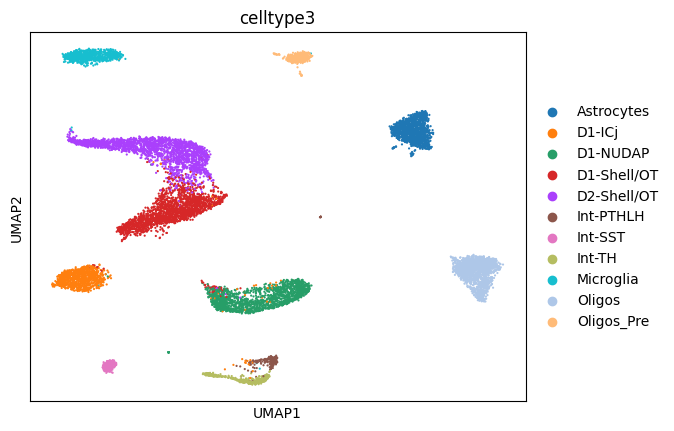

In [9]:
sc.pl.umap(adata2, color="celltype3")

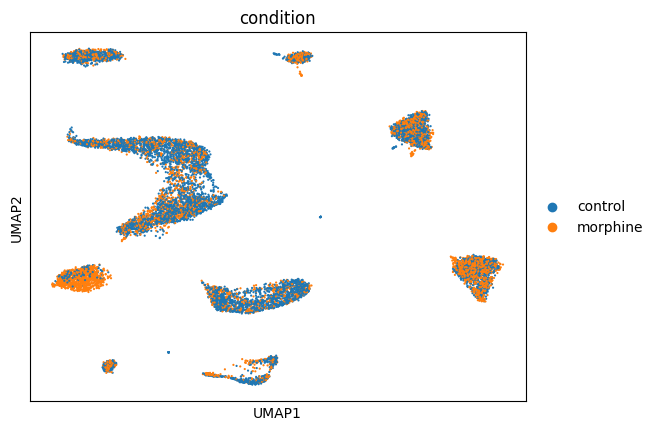

In [5]:
sc.pl.umap(adata2, color="condition")

In [14]:
rename_dict = {
    "Microglia": "Microglia",
    "Oligos": "Oligodendrocytes",
    "Oligos_Pre": "OPCs",
    "Astrocytes": "Astrocytes",
    "Endothelial": "Endothelial cells",
    "Mural": "Mural cells",
    "D1-Matrix": "D1 MSNs (Matrix)",
    "D2-Matrix": "D2 MSNs (Matrix)",
    "D1-Striosome": "D1 MSNs (Striosome)",
    "D2-Striosome": "D2 MSNs (Striosome)",
    "D1/D2-Hybrid": "D1/D2 Hybrid MSNs",
    "Int-PTHLH": "PTHLH+ Interneurons",
    "Int-CCK": "CCK+ Interneurons",
    "Int-SST": "SST+ Interneurons",
    "Int-TH": "TH+ Interneurons"
}
adata = adata1
adata.obs['celltype'] = adata.obs['celltype3'].map(rename_dict)


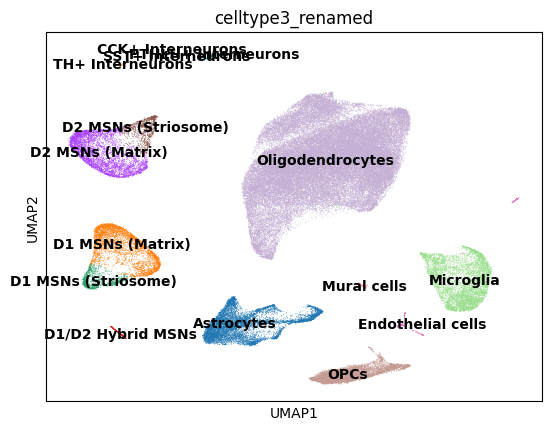

In [15]:
sc.pl.umap(adata, color='celltype3_renamed', legend_loc='on data')


In [27]:
adata.obs["Sex"].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

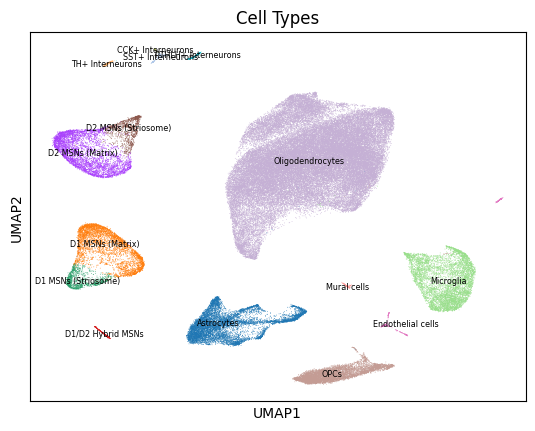

In [19]:
sc.pl.umap(adata, color='celltype3_renamed', legend_loc='on data', legend_fontsize='xx-small', legend_fontweight='light', title='Cell Types')

In [3]:
gene_groups = {
    "Classical Complement": ["C1QA", "C1QB", "C1QC", "C1R", "C1S", "C2", "C4A", "C4B", "C3"],
    "Alternative Complement": ["CFB", "CFD", "CFP", "CFH", "CFI", "CR1", "CR2"],
    "Complosome": ["C3", "C5", "CD46", "CTSL", "C3AR1", "C5AR1", "C5AR2"],
    "Inflammasome / IL-1": ["NLRP3", "PYCARD", "CASP1", "IL1B", "IL18", "IL1R1", "IL1R2", "IL1RN"],
    "TNF Signaling": ["TNF", "TNFRSF1A", "TNFRSF1B", "TNFAIP3", "MAPK8", "MAPK14"],
    "Interferon Response": ["IFNG", "IFNGR1", "IFNGR2", "STAT1", "IRF1", "IRF7", "IFNA5", "IL6", "IL10"],  # Replaced IFNA1/IFNB1
    "NF-κB Pathway": ["NFKB1", "RELA", "NFKB2", "RELB", "NFKBIA"]
}

In [4]:
import itertools

genes_ordered = list(itertools.chain.from_iterable(gene_groups.values()))
group_labels = list(gene_groups.keys())
group_positions = [0]
for g in gene_groups.values():
    group_positions.append(group_positions[-1] + len(g))
group_positions = group_positions[:-1]

In [ ]:
import scanpy as sc

# Subsetting by OUD/Normal and Male/Female
adata_subset = adata[adata.obs['Dx_OUD'].isin(['OUD', 'None']) & adata.obs['Sex'].isin(['M', 'F']), :]

# Ensure the 'Dx_OUD' column is a string type to avoid issues with categorical data
adata_subset.obs['Dx_OUD'] = adata_subset.obs['Dx_OUD'].astype(str)

# Replace 'None' with 'Normal' in the Dx_OUD column
adata_subset.obs['Dx_OUD'] = adata_subset.obs['Dx_OUD'].replace('None', 'Normal')

# Ensure 'Sex' is also treated as a string
adata_subset.obs['Sex'] = adata_subset.obs['Sex'].astype(str)

# Now create the new combined column 'OUD_Sex_Group'
adata_subset.obs['OUD_Sex_Group'] = adata_subset.obs['Dx_OUD'] + "_" + adata_subset.obs['Sex']

# Now, calculate the average expression per group
sc.tl.rank_genes_groups(adata_subset, groupby='OUD_Sex_Group', method='t-test')
grouped_expression = adata_subset.raw.to_adata().to_df().groupby(adata_subset.obs['OUD_Sex_Group']).mean()

# Plot the heatmap
sc.pl.heatmap(
    adata_subset,
    var_names=genes_ordered,  # list of genes you want to plot
    groupby='OUD_Sex_Group',  # Group by OUD and Sex
    use_raw=True,  # Use the raw data (if you have raw data)
    # cmap='coolwarm',  # Adjust color map if needed
    figsize=(12, 8),  # Adjust size to fit your plot
    show=True
)

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_45330/3510364036.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_subset.obs['Dx_OUD'] = adata_subset.obs['Dx_OUD'].astype(str)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_46766/318549074.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['Dx_OUD'] = adata.obs['Dx_OUD'].replace('None', 'Normal')
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_46766/318549074.py:18: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_subset.obs['OUD_Sex_Group'] = adata_subset.obs['Dx_OUD'].astype(str) + "_" + adata_subset.obs['Sex'].astype(str)


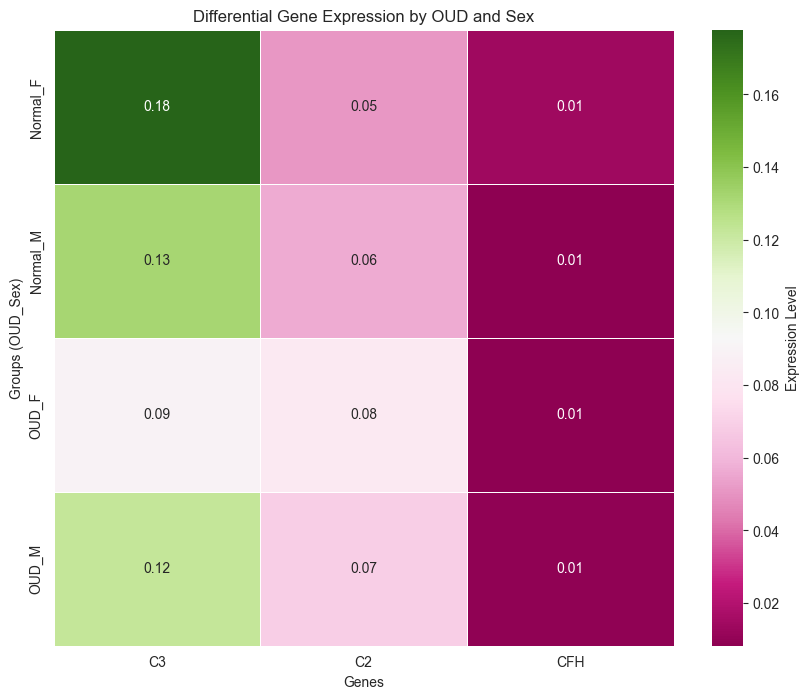

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load your data
adata = sc.read("/Users/aumchampaneri/PycharmProjects/Complement-OUD/GSE233279/GSE225158_BU_OUD_Striatum_refined_all_SeuratObj_N22.h5ad")

# Replace 'None' with 'Normal' in the Dx_OUD column
adata.obs['Dx_OUD'] = adata.obs['Dx_OUD'].replace('None', 'Normal')

# 1) Subset by OUD/Normal and Gender
adata_subset = adata[adata.obs['Dx_OUD'].isin(['OUD', 'Normal']) & adata.obs['Sex'].isin(['M', 'F']), :]

# 2) Create a new column combining Dx_OUD and Sex for grouping
adata_subset.obs['OUD_Sex_Group'] = adata_subset.obs['Dx_OUD'].astype(str) + "_" + adata_subset.obs['Sex'].astype(str)


# We will assume 'genes_of_interest' is a list of your DEGs
genes_of_interest = ['C3', 'C2', 'CFH']  # Replace with actual gene names

# Select the expression data for your genes of interest
expr_data = adata_subset[:, genes_of_interest].to_df()

# 4) Create the heatmap
# Get average expression for each group (OUD_Sex_Group)
expr_data_grouped = expr_data.groupby(adata_subset.obs['OUD_Sex_Group']).mean()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(expr_data_grouped, cmap='PiYG', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Expression Level'})

# Add titles and labels
plt.title("Differential Gene Expression by OUD and Sex")
plt.xlabel("Genes")
plt.ylabel("Groups (OUD_Sex)")

# Show plot
plt.show()


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
adata = sc.read("/Users/aumchampaneri/PycharmProjects/Complement-OUD/GSE233279/GSE225158_BU_OUD_Striatum_refined_all_SeuratObj_N22.h5ad")

# 1. Clean and prepare annotations
# Replace 'None' with 'Normal' using the recommended categorical method
if pd.api.types.is_categorical_dtype(adata.obs['Dx_OUD']):
    adata.obs['Dx_OUD'] = adata.obs['Dx_OUD'].cat.rename_categories(
        {cat: 'Normal' if cat == 'None' else cat for cat in adata.obs['Dx_OUD'].cat.categories}
    )
else:
    adata.obs['Dx_OUD'] = adata.obs['Dx_OUD'].replace('None', 'Normal')

# 2. Subset the data and make a copy to avoid view modification warning
adata_subset = adata[
    adata.obs['Dx_OUD'].isin(['OUD', 'Normal']) & adata.obs['Sex'].isin(['M', 'F'])
].copy()

# 3. Create a new grouping column
adata_subset.obs['OUD_Sex_Group'] = adata_subset.obs['Dx_OUD'].astype(str) + "_" + adata_subset.obs['Sex'].astype(str)

# 4. Calculate average expression per group
sc.tl.rank_genes_groups(adata_subset, groupby='OUD_Sex_Group', method='t-test')  # Optional if you're doing DE analysis

# 5. Plot average expression of a specific gene (e.g., "FOS")
gene = "C3"
group_means = (
    adata_subset.to_df()[gene]
    .groupby(adata_subset.obs['OUD_Sex_Group'])
    .mean()
    .sort_index()
)

# 6. Bar plot
plt.figure(figsize=(8, 6))
group_means.plot(kind='bar', color='skyblue')
plt.title(f"Average expression of {gene}")
plt.ylabel("Average expression (log-normalized)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_47141/809323639.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata.obs['Dx_OUD']):


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure clean working copy
adata = sc.read("/Users/aumchampaneri/PycharmProjects/Complement-OUD/GSE233279/GSE225158_BU_OUD_Striatum_refined_all_SeuratObj_N22.h5ad")

# 2. Standardize group labels
if isinstance(adata.obs['Dx_OUD'].dtype, pd.CategoricalDtype):
    adata.obs['Dx_OUD'] = adata.obs['Dx_OUD'].cat.rename_categories({'None': 'Normal'})
else:
    adata.obs['Dx_OUD'] = adata.obs['Dx_OUD'].replace('None', 'Normal')

# 3. Create group variable and subset
adata.obs['OUD_Sex_Group'] = adata.obs['Dx_OUD'].astype(str) + "_" + adata.obs['Sex'].astype(str)

# 4. Define your gene list (replace with actual genes)
genes_of_interest = ['C3', 'CFH', 'C5']  # replace with actual genes
adata_subset = adata[:, genes_of_interest].copy()

# 5. Extract expression matrix as DataFrame, ensure dense format
expr_df = pd.DataFrame(
    adata_subset.X.toarray(),  # Convert to dense format for DataFrame
    index=adata_subset.obs_names,
    columns=genes_of_interest
)

# 6. Build metadata DataFrame for annotations, make sure index matches
meta_df = meta_df.reset_index()
meta_df = adata_subset.obs[['OUD_Sex_Group', 'celltype3']]
meta_df.index = expr_df.index  # Ensure the indices are aligned

# 7. Create color palettes for annotations
group_palette = dict(zip(meta_df['OUD_Sex_Group'].unique(), sns.color_palette("Set2")))
celltype_palette = dict(zip(meta_df['celltype3'].unique(), sns.color_palette("tab20", len(meta_df['celltype3'].unique()))))

# Row annotations for OUD/Sex group and Cell type
row_colors = pd.DataFrame({
    'OUD_Sex_Group': meta_df['OUD_Sex_Group'].map(group_palette),
    'CellType': meta_df['celltype3'].map(celltype_palette)
}, index=meta_df.index)

# 8. Create clustermap
sns.clustermap(
    expr_df,
    row_colors=row_colors,
    col_cluster=False,
    row_cluster=False,
    cmap='viridis',
    figsize=(12, 10)
)

# 9. Add legends manually
for label, color in group_palette.items():
    plt.plot([], [], marker="s", label=label, color=color, linestyle="")

for label, color in celltype_palette.items():
    plt.plot([], [], marker="s", label=label, color=color, linestyle="")

plt.legend(title="Group / Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gene Expression with Dx_OUD and Cell Type Annotations")
plt.show()


NotImplementedError: isna is not defined for MultiIndex

In [2]:
adata.obs

,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,orig.ident,scds.hybrid_score,scds.keep,percent.mt,miQC.probability,miQC.keep,...,DSM.IV.CUD,integrated_snn_res.0.5,celltype1,celltype2,integrated_snn_res.2,celltype3,integrated_snn_res.0.1,level1,level2,n_genes
AAACCCAAGTGCAGGT_1,6472.0,2850,6621.0,2849,LR_RM_C1034,0.124318,keep,0.247219,0.016225,keep,...,0,22,Microglia,Microglia,7,Microglia,8,CTL,Microglia,2850
AAACCCACACTAGGCC_1,4266.0,2266,6043.0,2268,LR_RM_C1034,0.082179,keep,0.046882,0.018794,keep,...,0,22,Microglia,Microglia,7,Microglia,8,CTL,Microglia,2266
AAACCCACACTGCGTG_1,4813.0,2141,6232.0,2141,LR_RM_C1034,0.292227,keep,0.103885,0.015193,keep,...,0,0,Oligos,Oligos,1,Oligos,0,CTL,Oligos,2141
AAACCCACAGCGAACA_1,10929.0,3019,7937.0,3019,LR_RM_C1034,0.327511,keep,0.009150,0.023089,keep,...,0,0,Oligos,Oligos,52,Oligos,0,CTL,Oligos,3019
AAACCCACAGCGGTTC_1,5689.0,2387,6440.0,2387,LR_RM_C1034,0.310547,keep,0.246089,0.015754,keep,...,0,19,Oligos,Oligos,0,Oligos,1,CTL,Oligos,2387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGCATCCCG_22,25055.0,5434,10414.0,3599,LR_RM_P612,0.388670,keep,0.227500,0.011523,keep,...,0,21,Oligos_Pre,Oligos_Pre,50,Oligos_Pre,7,CTL,Oligos_Pre,5434
TTTGGTTAGCCGAATG_22,100341.0,9279,11788.0,3453,LR_RM_P612,0.099974,keep,0.008969,0.012924,keep,...,0,23,MSNs,D1-Matrix,3,D1-Matrix,10,CTL,D1-Matrix,9279
TTTGGTTCAACCACAT_22,7713.0,2772,7866.0,2772,LR_RM_P612,0.494697,keep,0.090756,0.014665,keep,...,0,19,Oligos,Oligos,0,Oligos,1,CTL,Oligos,2772
TTTGGTTCAAGGTTGG_22,15067.0,4392,9951.0,4233,LR_RM_P612,0.717101,keep,0.013274,0.020454,keep,...,0,3,Oligos,Oligos,16,Oligos,11,CTL,Oligos,4392
